In [1]:
import os
import pandas as pd
import requests
import xlrd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

In [2]:
current_date = date.today()
formatted_date = current_date.strftime("%Y-%m-%d")
formatted_date

'2020-03-25'

In [3]:
covid_data_url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-"+formatted_date+".xlsx"
covid_data_url

'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-25.xlsx'

In [4]:
df_xls_data = pd.read_excel(covid_data_url)
df_xls_data.to_excel('data/COVID-19-geographic-disbtribution-worldwide.xlsx', index=False)

In [5]:
total_cases = df_xls_data['Cases'].sum()
total_cases

416916

In [6]:
total_deaths = df_xls_data['Deaths'].sum()
total_deaths

18565

In [7]:
xls_to_csv = df_xls_data[['DateRep', 'Countries and territories', 'Cases', 'Deaths']]
xls_to_csv.to_csv('data/country_wide_data.csv', index=False)

In [8]:
world_data_by_country = pd.read_csv('data/country_wide_data.csv')

In [9]:
total_cases_by_country = world_data_by_country[['Countries and territories','Cases']].groupby('Countries and territories').sum()

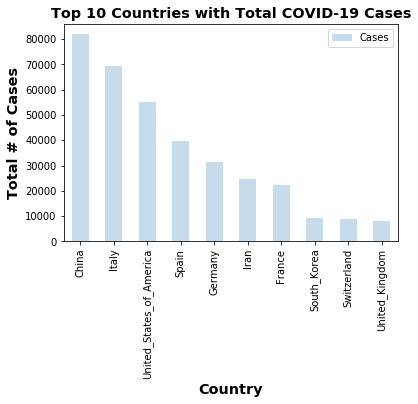

In [10]:
total_case_chart = total_cases_by_country.sort_values(by='Cases', ascending=False).head(10).plot(kind='bar', alpha=0.25)
total_case_chart.set_xlabel("Country", fontweight='bold', fontsize='x-large')
total_case_chart.set_ylabel("Total # of Cases", fontweight='bold', fontsize='x-large')
plt.title('Top 10 Countries with Total COVID-19 Cases', fontweight='bold', fontsize='x-large')
#plt.show()
plt.savefig('static/images/top10-countries-covid-19-cases.png')

In [ ]:
total_deaths_by_country = world_data_by_country[['Countries and territories','Deaths']].groupby('Countries and territories').sum()

In [ ]:
total_death_chart = total_deaths_by_country.sort_values(by='Deaths', ascending=False).head(10).plot(kind='bar', alpha=0.25)
total_death_chart.set_xlabel("Country", fontweight='bold', fontsize='x-large')
total_death_chart.set_ylabel("Total # of Deaths", fontweight='bold', fontsize='x-large')
plt.title('Top 10 Countries with Total COVID-19 Deaths', fontweight='bold', fontsize='x-large')
#plt.show()
plt.savefig('static/images/top10-countries-covid-19-deaths.png')